In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

In [7]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [11]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [12]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [16]:
x,y = data[0][0], data[1][0]

print(y)

tensor(1)


In [17]:
import matplotlib.pyplot as plt

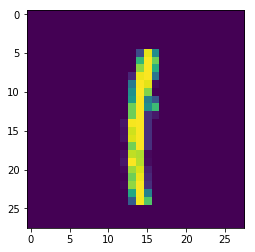

In [23]:
plt.imshow(data[0][0].view(28,28))

In [26]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict) #count of each type of number

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [31]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")
    #percentages for each digit 

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [39]:
import torch.nn as nn
import torch.nn.functional as F

In [40]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #definition of layers
        self.fc1 = nn.Linear(28*28, 64) #28*28 is flattened pixels, 3 layers of 64 neurons
        self.fc2 = nn.Linear(64, 64) #64 is input from previous layer
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) #we want 10 ouputs
    def forward(self, x):
        x = F.relu(self.fc1(x)) #F.relu is linear activitation function -- rectified linear 
        x = F.relu(self.fc2(x)) #activtiation is only run on output (the first three "64s")
        #could add logic to forward method, with if statements. e.g. To Use/not use activation function 
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1) #to get probabilty distribution 

net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [43]:
X = torch.rand(28,28)
X = X.view(-1, 28*28) # -1 means that it is unknown output shape


In [45]:
output = net(X)
output

tensor([[-2.2551, -2.2774, -2.3502, -2.2406, -2.3101, -2.4228, -2.2707, -2.3328,
         -2.2604, -2.3192]], grad_fn=<LogSoftmaxBackward>)

In [48]:
#loss - how wrong is model (want it to decrease -- model will always be somewhat inaccurate)
#optimizer -- adjust weights based on gradients to lower loss over time

import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001) #lr = learning rate 

EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        #data has featuresets and labels
        X,y = data
        net.zero_grad() #zero the gradient for loss
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.0463, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.0531, grad_fn=<NllLossBackward>)


In [51]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        ouput = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.099


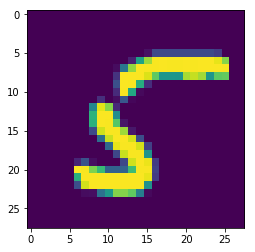

In [55]:
plt.imshow(X[1].view(28,28))


In [58]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(5)
